Learned: w=300.39, b=49767
True:    w=300.0, b=50000.0


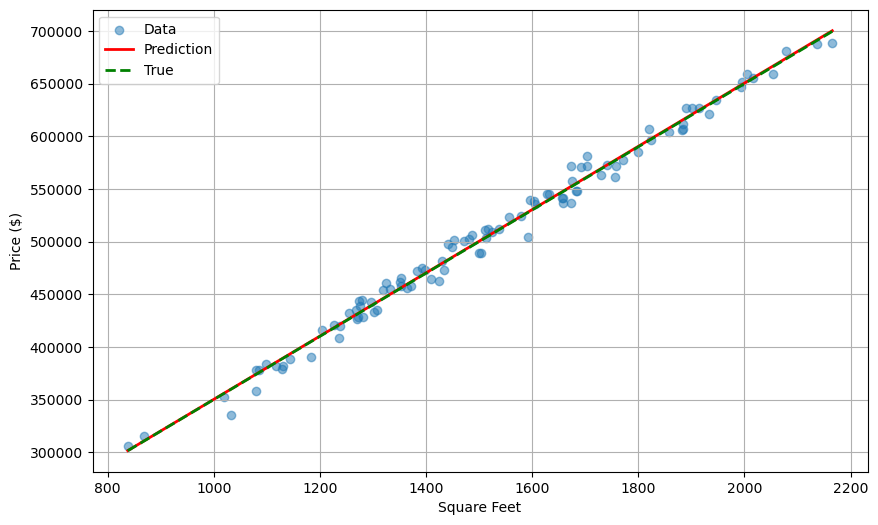

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(42)

# Generate data
TRUE_W = 300.0
TRUE_B = 50000.0
n_samples = 100
sqft = torch.randn(n_samples, 1) * 300 + 1500
noise = torch.randn(n_samples, 1) * 10000
price = TRUE_W * sqft + TRUE_B + noise

# Normalize
sqft_mean, sqft_std = sqft.mean(), sqft.std()
price_mean, price_std = price.mean(), price.std()
sqft_norm = (sqft - sqft_mean) / sqft_std
price_norm = (price - price_mean) / price_std

# Define model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train
for epoch in range(2000):
    y_pred = model(sqft_norm)
    loss = criterion(y_pred, price_norm)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Convert back to original scale
w_norm = model.linear.weight.item()
b_norm = model.linear.bias.item()
w = w_norm * price_std / sqft_std
b = price_mean - w * sqft_mean + b_norm * price_std

print(f"Learned: w={w:.2f}, b={b:.0f}")
print(f"True:    w={TRUE_W}, b={TRUE_B}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(sqft.numpy(), price.numpy(), alpha=0.5, label='Data')
x_line = torch.linspace(sqft.min(), sqft.max(), 100).reshape(-1, 1)
x_line_norm = (x_line - sqft_mean) / sqft_std
with torch.no_grad():
    y_line = model(x_line_norm) * price_std + price_mean
plt.plot(x_line.numpy(), y_line.numpy(), 'r-', linewidth=2, label='Prediction')
plt.plot(x_line.numpy(), (TRUE_W * x_line + TRUE_B).numpy(), 'g--', linewidth=2, label='True')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()